In [3]:
using Revise
using Statistics, XGBoost
using PrevisibilityCrawler
pc = PrevisibilityCrawler;
Base.displaysize() = (30, 800)

In [4]:
# plt.plot(pc.loadsignal(papers[3]))

In [63]:
x, y, control, signal, xt, yt, controlt = loadsimulpaper(papers[3]);

In [66]:
params = Dict(:maxdepth=>6, :nfeatures=>10, :sampleportion=>0.6, :ntrees=>100)
model = RandomForestModel(Dict(:params => params));
pipe = Pipeline(model, mae);
train_error, test_error = crossvalidation!(pipe, x, y , k=5)

(0.002769433371940613, 0.0030158344032529026)

In [70]:
params = rfgridmodel(x, y, ntrees=50)
params[:ntress] = 100
model = RandomForestModel(Dict(:params => params));
pipe = Pipeline(model, mae);
train_error, test_error = crossvalidation!(pipe, x, y , k=5)

(0.0023908668992259105, 0.002858695355743996)

In [72]:
params

Dict{Symbol,Real} with 4 entries:
  :nfeatures     => 25
  :sampleportion => 1.0
  :ntrees        => 100
  :maxdepth      => 8

In [71]:
train_error, test_error = crossvalidation!(pipe, x, y , k=5)

(0.0023946458800267125, 0.002857662559806959)

In [79]:
function boostgrid(x, y)
    param = gridoptmodel(x, y, nr_rounds=50)
    model = XgBoostModel(Dict(:param => param, :nr_round => 500));
end

function rfgrid(x, y)
    params = rfgridmodel(x, y, ntrees=50)
    model = RandomForestModel(Dict(:params => params));
end

rfgrid (generic function with 1 method)

In [80]:
df3 = wholebench(rfgrid, thresh=0.99)

Computing...100%|███████████████████████████████████████| Time: 0:18:54


,Stock,SignalCoverage,WholeMAE,SelectedMAE,WholeCDC,SelectedCDC,WholeDataDirection,SelectedDirection,WholeNaiveMae,SelectedNaiveMae,WholeMASE,SelectedMASE
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BRFS3,0.987538,0.00381498,0.00386409,0.519687,0.504497,0.522339,0.52262,0.00357415,0.00358678,1.06738,1.07731
2,PETR4,0.464904,0.00398686,0.00467863,0.521943,0.522129,0.532621,0.541176,0.00334756,0.00344242,1.19098,1.35911
3,BBAS3,0.840792,0.00357732,0.0035692,0.513063,0.515305,0.514615,0.518843,0.00335398,0.00329441,1.06659,1.08341
4,BBDC4,0.822991,0.00339792,0.0033609,0.504432,0.517695,0.528071,0.525389,0.00309359,0.00302779,1.09838,1.11002
5,ITSA4,0.973663,0.00290913,0.00301001,0.561994,0.564849,0.556051,0.557775,0.00275518,0.00275975,1.05587,1.09068
6,VALE3,0.9,0.00350338,0.00347987,0.510326,0.506643,0.51712,0.5157,0.00320186,0.00317973,1.09417,1.09439
7,ITUB4,0.554271,0.00292586,0.0028827,0.510881,0.528344,0.513194,0.506012,0.00275161,0.00272611,1.06333,1.05744
8,ABEV3,0.879461,0.00310181,0.0031369,0.525377,0.524196,0.536479,0.534716,0.00294619,0.00290302,1.05282,1.08056
9,RENT3,0.649846,0.00422217,0.0043308,0.534425,0.53387,0.505301,0.5095,0.00405475,0.00403444,1.04129,1.07346


In [81]:
crawlertests(df3)

,MAE,CDC,MASE
,Float64,Float64,Float64
1,0.754946,0.606647,0.9889


In [46]:
df2 = wholebench(boostgrid, thresh=0.99)

Computing...100%|███████████████████████████████████████| Time: 0:09:03


,Stock,SignalCoverage,WholeMAE,SelectedMAE,WholeCDC,SelectedCDC,WholeDataDirection,SelectedDirection,WholeNaiveMae,SelectedNaiveMae,WholeMASE,SelectedMASE
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BRFS3,0.987538,0.00498638,0.00503147,0.513324,0.506242,0.522339,0.52262,0.00357415,0.00358678,1.39512,1.40278
2,PETR4,0.464904,0.00591069,0.00534295,0.523766,0.530252,0.532621,0.541176,0.00334756,0.00344242,1.76567,1.55209
3,BBAS3,0.840792,0.00455052,0.00439552,0.510735,0.518382,0.514615,0.518843,0.00335398,0.00329441,1.35675,1.33424
4,BBDC4,0.822991,0.00401911,0.00398067,0.518081,0.513592,0.528071,0.525389,0.00309359,0.00302779,1.29917,1.31471
5,ITSA4,0.973663,0.0038366,0.00371206,0.551999,0.564433,0.556051,0.557775,0.00275518,0.00275975,1.3925,1.34507
6,VALE3,0.9,0.00400613,0.00405608,0.510598,0.512983,0.51712,0.5157,0.00320186,0.00317973,1.25119,1.27561
7,ITUB4,0.554271,0.00359257,0.00360577,0.507073,0.512883,0.513194,0.506012,0.00275161,0.00272611,1.30563,1.32268
8,ABEV3,0.879461,0.0036718,0.00380631,0.544013,0.536069,0.536479,0.534716,0.00294619,0.00290302,1.24629,1.31115
9,RENT3,0.649846,0.00542158,0.0055933,0.531606,0.532012,0.505301,0.5095,0.00405475,0.00403444,1.3371,1.38639


In [48]:
crawlertests(df2)

,MAE,CDC,MASE
,Float64,Float64,Float64
1,0.00570076,0.447401,0.0402183


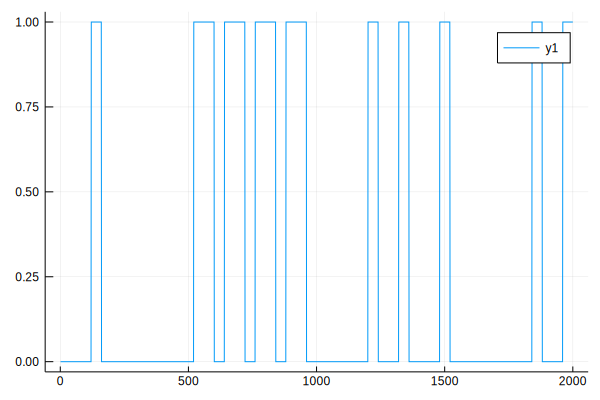

In [30]:
plt.plot(pc.loadsignal(papers[2]))

In [ ]:
[pc.crawlpaper2(paper) for paper in papers]

Progress: 100%|█████████████████████████████████████████| Time: 0:11:37
Progress: 100%|█████████████████████████████████████████| Time: 0:11:40
Progress: 100%|█████████████████████████████████████████| Time: 0:08:18
Progress: 100%|█████████████████████████████████████████| Time: 0:14:24
Progress: 100%|█████████████████████████████████████████| Time: 0:08:27
Progress: 100%|█████████████████████████████████████████| Time: 0:07:42
Progress: 100%|█████████████████████████████████████████| Time: 0:07:13
Progress: 100%|█████████████████████████████████████████| Time: 0:09:42
Progress: 100%|█████████████████████████████████████████| Time: 0:09:02
Progress: 100%|█████████████████████████████████████████| Time: 0:08:40
Progress: 100%|█████████████████████████████████████████| Time: 0:09:48
Progress: 100%|█████████████████████████████████████████| Time: 0:09:09
Progress: 100%|█████████████████████████████████████████| Time: 0:08:15
Progress: 100%|█████████████████████████████████████████| Time: 

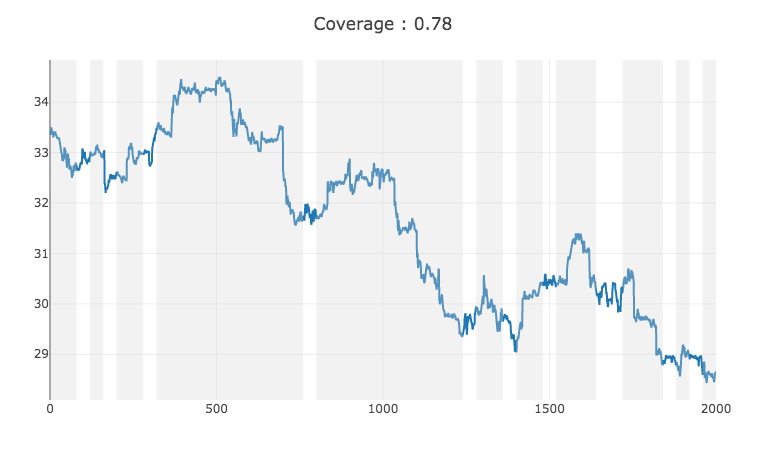

In [56]:
x, y, control, signal, xt, yt, controlt = loadsimulpaper(papers[3])
xp = x[signal, :]
yp = y[signal, :]
pc.plotprevisibility(control.lastPrice, signal)

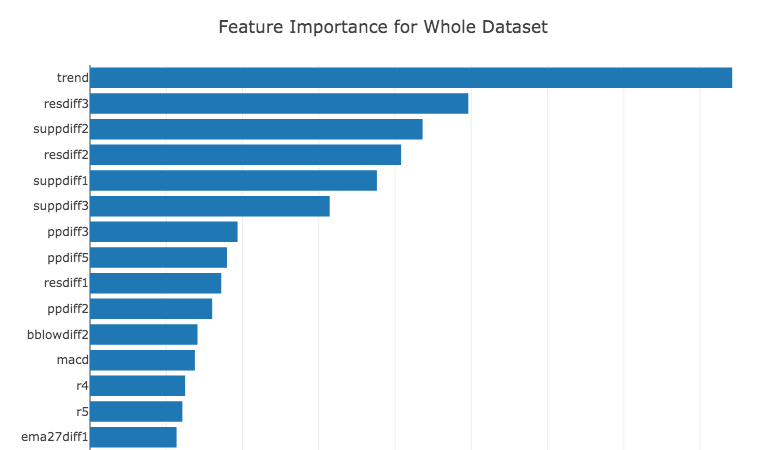

In [67]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, x, y)
xgb = getmodel(pipe)
feature_importance = importance(xgb, String.(names(x)))
fnames = [feature.fname for feature in feature_importance][1:15]
fvalues = [feature.gain for feature in feature_importance][1:15]
trace = pty.bar(y=fnames[end:-1:1], x=fvalues[end:-1:1], orientation='h')
pty.plot([trace], pty.Layout(title="Feature Importance for Whole Dataset",
                             margin=pty.attr(l=90, r=0, b=0, t=65)))

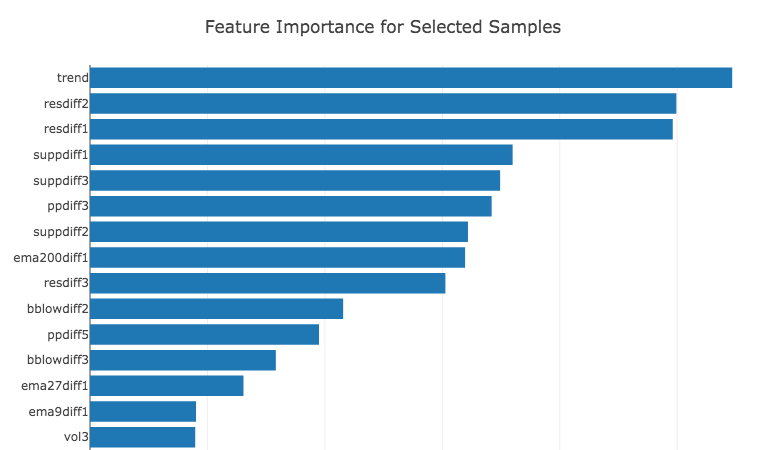

In [69]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, xp, yp)
xgb = getmodel(pipe)
feature_importance = importance(xgb, String.(names(xp)))
fnames = [feature.fname for feature in feature_importance][1:15]
fvalues = [feature.gain for feature in feature_importance][1:15]
trace = pty.bar(y=fnames[end:-1:1], x=fvalues[end:-1:1], orientation='h')
pty.plot([trace], pty.Layout(title="Feature Importance for Selected Samples",
                             margin=pty.attr(l=90, r=0, b=0, t=65)))

In [ ]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
pipe = Pipeline(model, mse; ytransform=normtransform());
train!(pipe, x, y)
xgb = getmodel(pipe)
feature_importance = importance(xgb, String.(names(xfull)))

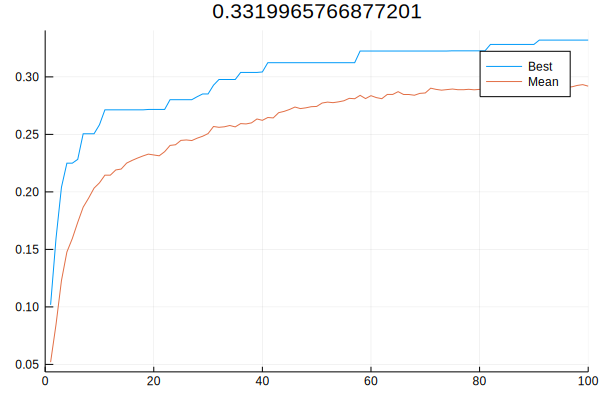

In [9]:
minsamples = 400
nrparticles = 100
modelloss = rmae
interval = 1:2000
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 10));
explainedmae(loss, prevy, datasetsize) =  (length(prevy)/datasetsize)*0.3 + (1- loss)
prevloss = explainedmae
pipe = Pipeline(model, modelloss);
algo = Algorithm(prevloss, minsamples=minsamples, k=3);
evolsettings = EvolSettings(;pressure=2, mutation_p=10, crossover_p=80, elitism=1);
gasettings = GA(2000 ;minsamples=400, groupsize=40);
settings = PSO(phip=.5, phig=1, w=.5, K=5, max_iter=100)
nrparticles = 100; groupsize = 40; minsamples =minsamples;
scorefunction = training(x, y, algo, pipe);
particles = Particle.(random_init(nrparticles, groupsize, x, minsamples=minsamples), scorefunction);
particles, graphs = pso(particles, scorefunction, settings, "score")
# pop = init_genes(100, gasettings)
# pop, graphs = evolution(pop, scorefunction, 100, evolsettings, "progress", knn=5);
# scores = scorefunction(pop);
# best = pop[sortperm(scores, rev=true)[1]];

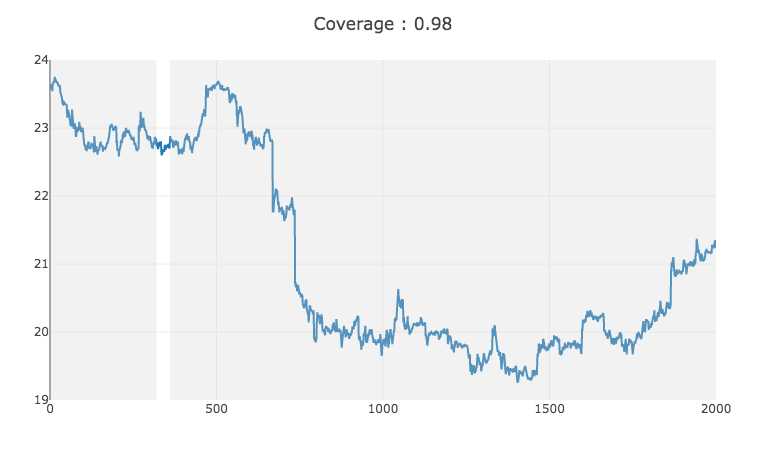

In [54]:
convert(Vector{Bool}, classify(particles))

2000-element Array{Bool,1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

In [39]:
signal = classify(particles)
xp = x[signal, :];
yp = y[signal, :];
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 10));
pipe = Pipeline(model, rmae);
crossvalidation!(pipe, xtemp, ytemp)

(0.8642958278284599, 0.9272978160418835)

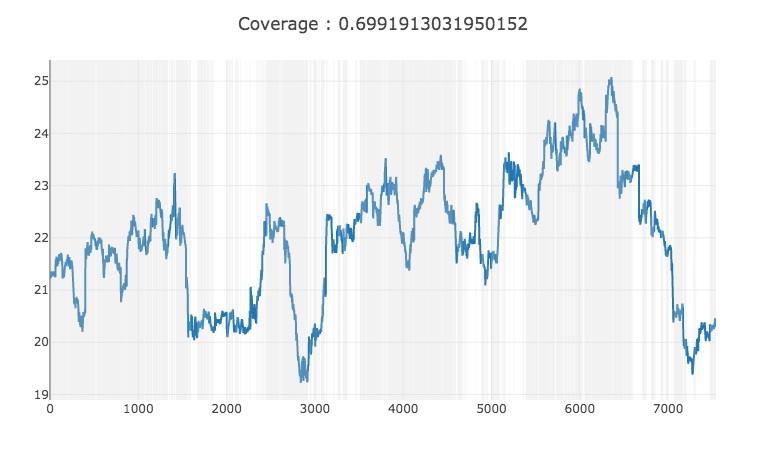

In [47]:
xp = x[signal, :];
yp = y[signal, :];
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);
predicted = XGBoost.predict(previsible, convert(Matrix,xt))
signalt = predicted .>= .99;
xtp = xt[signalt, :];
ytp = yt[signalt, :];
pc.plotprevisibility(controlt.lastPrice, signalt)

In [51]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(x, y, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, x, y)
prevf = (ins = loss(pipe, x, y), out = loss(pipe, xt, yt))

(ins = 0.19312642582421813, out = 1.4593399748168892)

In [52]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(xp, yp, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, xp, yp)
prevf = (ins = loss(pipe, xp, yp), out = loss(pipe, xtp, ytp))

(ins = 0.1876560211465912, out = 1.3738249753116685)

In [49]:
count(ytp .> 0)/length(ytp)

0.4630261660978385

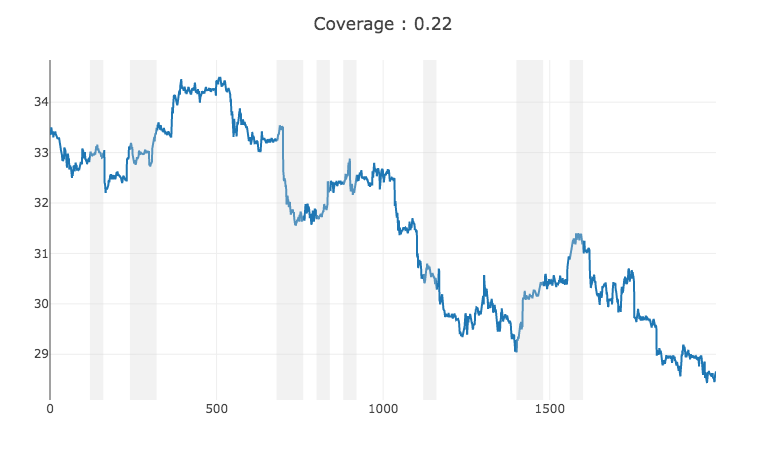

In [71]:
x,y, control, signal, xt, yt, controlt = loadsimulpaper(papers[3]);
pc.plotprevisibility(control.lastPrice, signal)

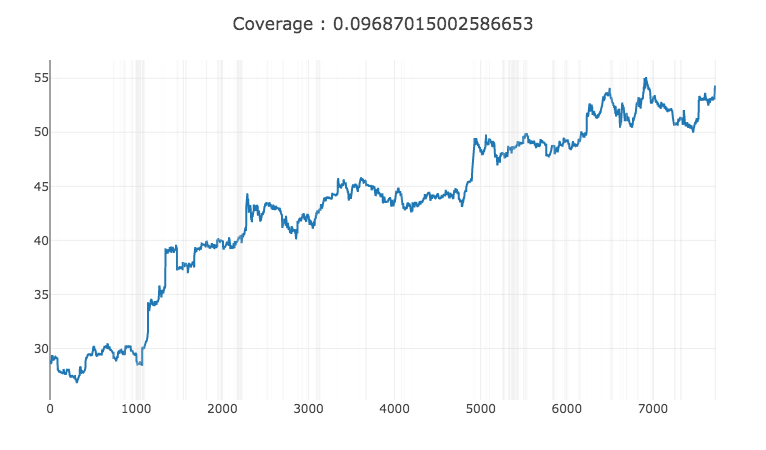

In [72]:
xp = x[signal, :];
yp = y[signal, :];
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);
predicted = XGBoost.predict(previsible, convert(Matrix,xt))
signalt = predicted .>= .7;
xtp = xt[signalt, :];
ytp = yt[signalt, :];
pc.plotprevisibility(controlt.lastPrice, signalt)

In [73]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(x, y, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, x, y)
prevf = (ins = loss(pipe, x, y), out = loss(pipe, xt, yt))

(ins = 0.10689574065961491, out = 1.569820421241111)

In [50]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(xp, yp, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, xp, yp)
prevf = (ins = loss(pipe, xp, yp), out = loss(pipe, xtp, ytp))

(ins = 0.08671737853927364, out = 1.4952291532038875)

In [75]:
count(ytp .> 0)/length(ytp), count(yt .> 0)/length(yt)

(0.4539385847797063, 0.4839627521986549)

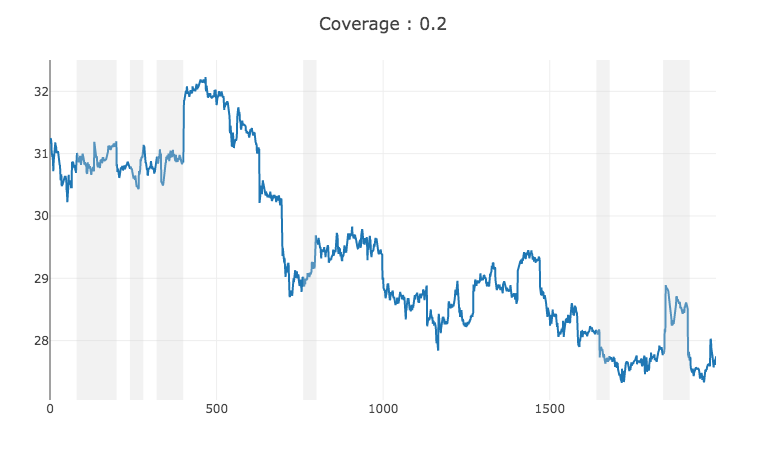

In [76]:
x,y, control, signal, xt, yt, controlt = loadsimulpaper(papers[4]);
pc.plotprevisibility(control.lastPrice, signal)

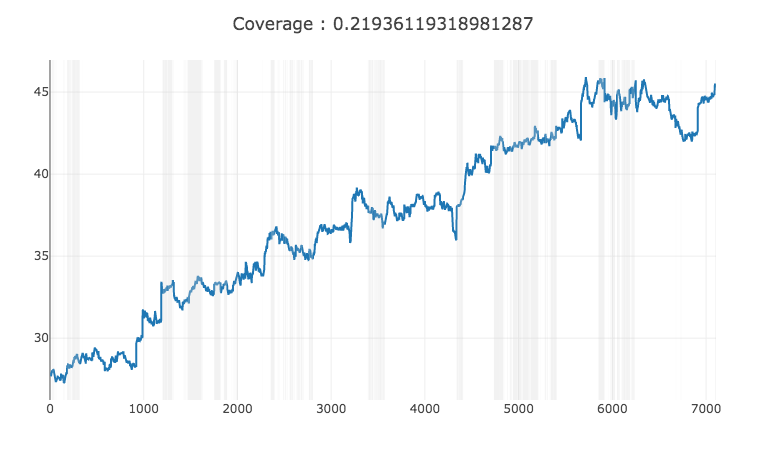

In [77]:
xp = x[signal, :];
yp = y[signal, :];
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);
predicted = XGBoost.predict(previsible, convert(Matrix,xt))
signalt = predicted .>= .7;
xtp = xt[signalt, :];
ytp = yt[signalt, :];
pc.plotprevisibility(controlt.lastPrice, signalt)

In [78]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(x, y, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, x, y)
prevf = (ins = loss(pipe, x, y), out = loss(pipe, xt, yt))

(ins = 0.10867066483159492, out = 1.560648402287222)

In [79]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
# param = gridoptmodel(xp, yp, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
train!(pipe, xp, yp)
prevf = (ins = loss(pipe, xp, yp), out = loss(pipe, xtp, ytp))

(ins = 0.09428995033175983, out = 1.4423162615566578)

In [80]:
count(ytp .> 0)/length(ytp), count(yt .> 0)/length(yt)

(0.5022450288646568, 0.4975376389475165)